# Analyzing Mental Health Trends Among Students and Comparing performances of classifiers


In the following project we will compare different classifiers' accuracy on predicting student depression.


### About dataset

 A student depression dataset contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.
 These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies


## Code description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

Now we will create data set variable

In [2]:
data = pd.read_csv('Student Depression Dataset.csv')

Then it is nesessary to convert our dataset into dataframe format.

In [3]:
df = pd.DataFrame(data)

There is an Exploratory Data Analysis.

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

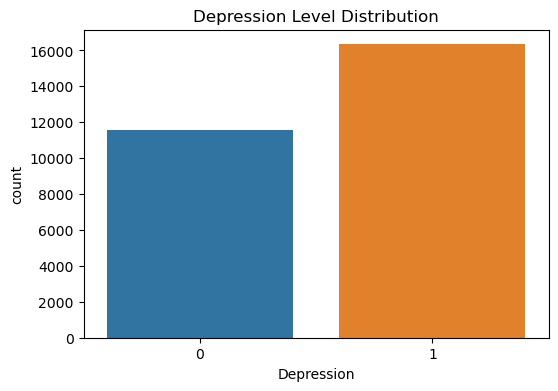

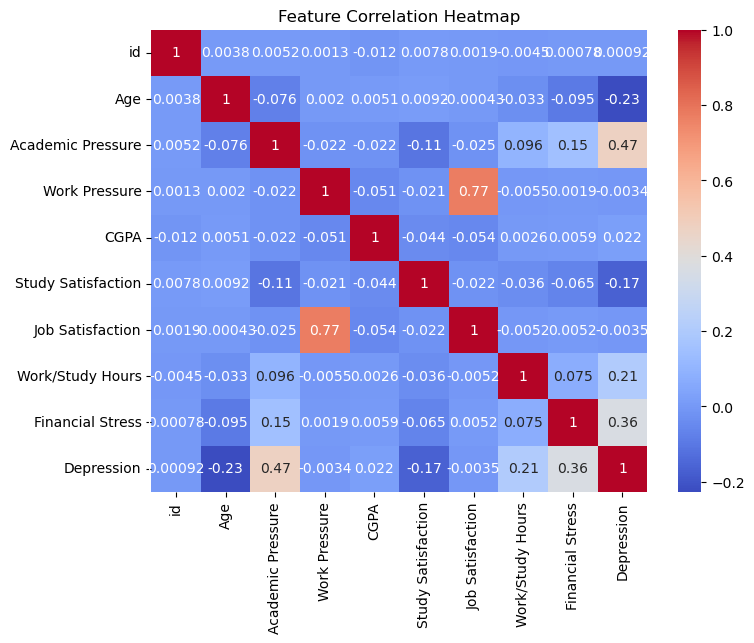

In [4]:
import seaborn as sns
display(df.head())         # first rows
print(df.info())           # column types & non-null counts
print(df.describe())       # summary stats for numeric features

#Class balance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df)
plt.title("Depression Level Distribution")
plt.show()

#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Our dataset may contain missing values which will be encoded as NaN. If one wants his classifier to work, one has to drop out this data.

In [5]:
data = data.dropna()

Some of the columns in our data do not correlate with depression so we will not include them in our dataset.

In [6]:
columns_to_drop = ['id', 'City', 'Profession', 'Degree']
data = data.drop(columns=columns_to_drop, errors='ignore')
 #We can use those columns to get statistics about certain group of people though.

In our dataset we have some categorial columns. Classifiers work only with numerical features. Thus one has to convert our categorial data into numerical data using Label Encoding.

In [7]:
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits',
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

Finally, one can define features and target variable.

In [8]:
X = data.drop(columns=['Depression'])  #for convenience we will write down our features this way.
y = data['Depression']

Now the goal is to split the data into training and testing data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then define classifiers for the test.

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

Subsequently, we define the simple algorithm to train every classifier and compare them using various metrics.


Logistic Regression
  Accuracy : 0.84
  Precision: 0.84
  Recall   : 0.84
  F1-score : 0.84

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



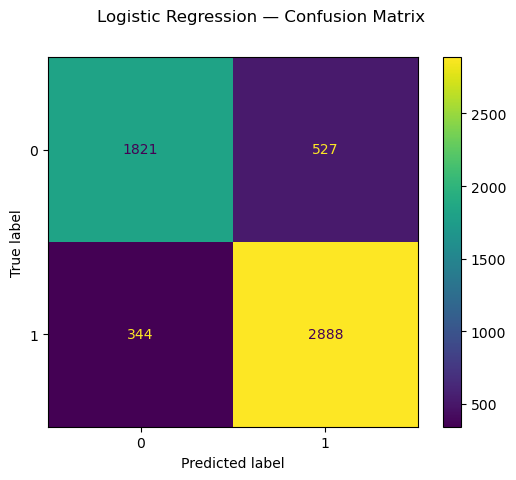


Random Forest
  Accuracy : 0.84
  Precision: 0.84
  Recall   : 0.84
  F1-score : 0.84

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2348
           1       0.84      0.88      0.86      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580



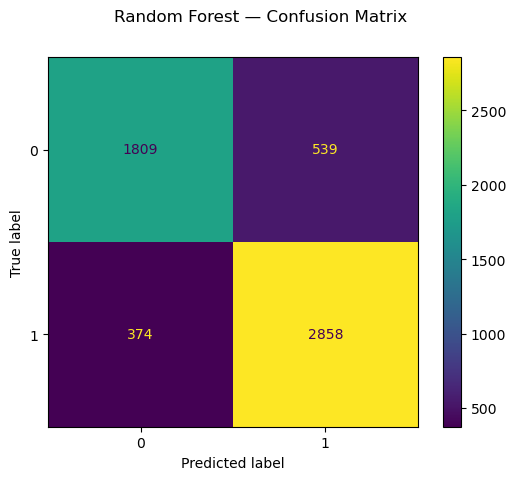


Support Vector Machine
  Accuracy : 0.84
  Precision: 0.84
  Recall   : 0.84
  F1-score : 0.84

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      2348
           1       0.84      0.90      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



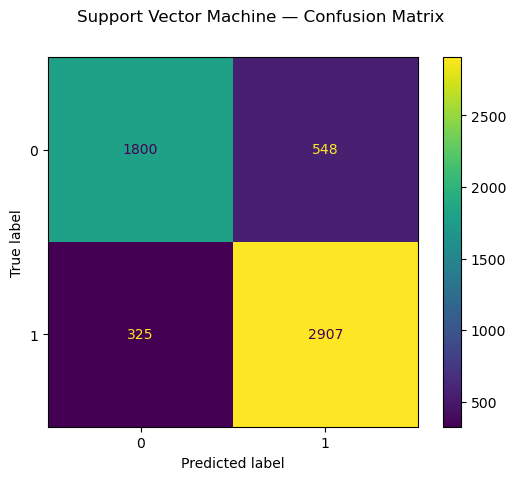


Decision Tree
  Accuracy : 0.77
  Precision: 0.77
  Recall   : 0.77
  F1-score : 0.77

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2348
           1       0.79      0.82      0.80      3232

    accuracy                           0.77      5580
   macro avg       0.76      0.76      0.76      5580
weighted avg       0.77      0.77      0.77      5580



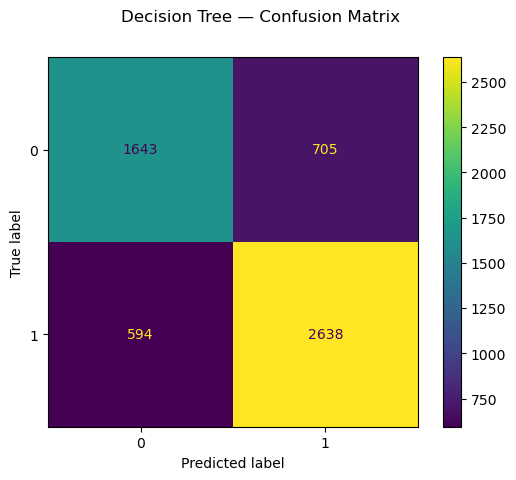


K-Nearest Neighbors
  Accuracy : 0.79
  Precision: 0.79
  Recall   : 0.79
  F1-score : 0.79

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2348
           1       0.80      0.86      0.83      3232

    accuracy                           0.79      5580
   macro avg       0.79      0.78      0.78      5580
weighted avg       0.79      0.79      0.79      5580



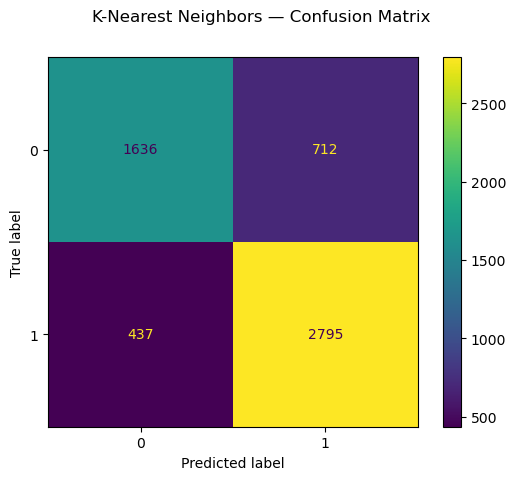

In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Core metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"\n{name}")
    print(f"  Accuracy : {acc:.2f}")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-score : {f1:.2f}\n")

    #Classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    #Confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.figure_.suptitle(f"{name} — Confusion Matrix")
    plt.show()

Eventually, there is a ROC curve comparisons for the classifiers. I did not include an ROC curve for the standard SVM classifier because, by default, scikit-learn’s SVC does not output probability estimates (needed for true ROC plotting) unless you explicitly set "probability=True", which considerably slows down training.

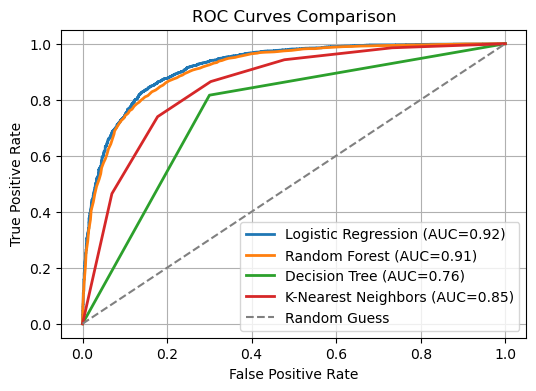

In [12]:
plt.figure(figsize=(6, 4))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
